In [65]:
from preprocessing import calculate_append_severity_scores, encode_class_scores
import pandas as pd

In [66]:
df = pd.read_csv('datasets/violations.csv')
df = encode_class_scores(violation_df=df)
df = calculate_append_severity_scores(violation_df=df)

In [67]:
df.head()

,violationid,buildingid,registrationid,boroid,boro,housenumber,lowhousenumber,highhousenumber,streetname,streetcode,...,councildistrict,censustract,bin,bbl,nta,certifieddate,newcertifybydate,newcorrectbydate,risk_score,risk_score_cat
0,10413107,53116,204446,2,BRONX,3565,3565,3565,BRUCKNER BOULEVARD,15920,...,13.0,26602.0,2046331.0,2.041780e+09,Pelham Bay-Country Club-City Island,NaN,NaN,NaN,1,1
1,10325067,70433,222588,2,BRONX,1120,1120,1120,EAST 225 STREET,28380,...,12.0,386.0,2090246.0,2.049030e+09,Eastchester-Edenwald-Baychester,NaN,NaN,NaN,1,1
2,10318007,43087,126972,1,MANHATTAN,504,504,506,WEST 167 STREET,37110,...,10.0,251.0,1062962.0,1.021230e+09,Washington Heights South,2014-09-25T00:00:00.000,NaN,NaN,0,0
3,10281624,92541,202243,2,BRONX,1023,1023,1023,LONGWOOD AVENUE,46820,...,17.0,89.0,2005744.0,2.027210e+09,Hunts Point,2014-07-03T00:00:00.000,NaN,NaN,1,1
4,10291962,150298,360978,3,BROOKLYN,837,837,837,43 STREET,8730,...,38.0,92.0,3018366.0,3.009250e+09,Sunset Park East,NaN,NaN,NaN,1,1


In [68]:
df['risk_score_cat'].value_counts()

1    50507
0    25056
2    24429
Name: risk_score_cat, dtype: int64

In [69]:
X = df.drop(columns=["risk_score", "risk_score_cat"])
y = df["risk_score_cat"]

In [70]:
y.value_counts()

1    50507
0    25056
2    24429
Name: risk_score_cat, dtype: int64

In [71]:
X.columns

Index(['violationid', 'buildingid', 'registrationid', 'boroid', 'boro',
       'housenumber', 'lowhousenumber', 'highhousenumber', 'streetname',
       'streetcode', 'zip', 'apartment', 'story', 'block', 'lot', 'class',
       'inspectiondate', 'approveddate', 'originalcertifybydate',
       'originalcorrectbydate', 'ordernumber', 'novid', 'novdescription',
       'novissueddate', 'currentstatusid', 'currentstatus',
       'currentstatusdate', 'novtype', 'violationstatus', 'rentimpairing',
       'latitude', 'longitude', 'communityboard', 'councildistrict',
       'censustract', 'bin', 'bbl', 'nta', 'certifieddate', 'newcertifybydate',
       'newcorrectbydate'],
      dtype='object')

In [72]:
for column in df.columns:
    print(f"{column}")
    print(df[column].value_counts())
    print()

violationid
10413107    1
13928485    1
13721122    1
13546784    1
13910974    1
           ..
12023463    1
11623655    1
11647953    1
11852527    1
16174759    1
Name: violationid, Length: 99992, dtype: int64

buildingid
65537     64
119285    59
344337    57
77561     56
806375    55
          ..
705448     1
481124     1
268783     1
649132     1
679596     1
Name: buildingid, Length: 36294, dtype: int64

registrationid
0         3057
207907      64
201131      59
332011      57
201115      56
          ... 
207852       1
344078       1
404847       1
214298       1
401292       1
Name: registrationid, Length: 33770, dtype: int64

boroid
3    36232
2    31981
1    20925
4     9485
5     1369
Name: boroid, dtype: int64

boro
BROOKLYN         36232
BRONX            31981
MANHATTAN        20925
QUEENS            9485
STATEN ISLAND     1369
Name: boro, dtype: int64

housenumber
20        239
15        231
125       216
1         203
250       200
         ... 
135-24      1
111-08  

In [73]:
columns_to_drop = ["violationid", "buildingid", "registrationid", "boroid", "housenumber", "lowhousenumber", "highhousenumber", "streetname",
                   "inspectiondate", "approveddate", "originalcertifybydate", "originalcorrectbydate",
                   "ordernumber", "novid", "novdescription", "novissueddate", "currentstatus", "novtype", 
                    "bin", "bbl", "nta", "certifieddate", "newcertifybydate", "newcorrectbydate", "currentstatusdate", "class"]

In [74]:
# convert low cardinality to other
# streetcode, apartment, story,
# normalize / bucketize latitude and longtitude

In [75]:
X = X.drop(columns=columns_to_drop)
X.head()

,boro,streetcode,zip,apartment,story,block,lot,currentstatusid,violationstatus,rentimpairing,latitude,longitude,communityboard,councildistrict,censustract
0,BRONX,15920,10461.0,2D,2,4178,5,19,Close,N,40.847944,-73.827568,10.0,13.0,26602.0
1,BRONX,28380,10466.0,2F,2,4903,59,9,Close,N,40.883849,-73.848345,12.0,12.0,386.0
2,MANHATTAN,37110,10032.0,5C,5,2123,59,19,Close,N,40.839429,-73.937687,12.0,10.0,251.0
3,BRONX,46820,10459.0,NaN,5,2721,41,9,Close,N,40.816500,-73.896505,2.0,17.0,89.0
4,BROOKLYN,8730,11232.0,8,3,925,64,19,Close,N,40.644506,-73.998732,12.0,38.0,92.0


In [76]:
oe_vars = ["boro"]
ord_vars = ["violationstatus", "rentimpairing"]
scaler_vars = ["latitude", "longitude"]
pass_through_vars = list(set(list(X.columns)).difference(set(oe_vars + ord_vars + scaler_vars)))
print(pass_through_vars)

['censustract', 'communityboard', 'story', 'lot', 'block', 'zip', 'currentstatusid', 'streetcode', 'councildistrict', 'apartment']


In [77]:
X["apartment"] = X["apartment"].str.replace(r'\D', '', regex=True).replace('', 2.0).astype('float').clip(upper=10).fillna(2.0)

with pd.option_context('display.max_rows', None):
    print(X["apartment"].value_counts())

2.0     41939
1.0     13659
10.0    11356
3.0     11071
4.0      8307
5.0      6135
6.0      4245
7.0      1487
8.0       995
9.0       797
0.0         1
Name: apartment, dtype: int64


In [78]:
X["story"] = X["story"].str.replace(r'\D', '', regex=True).replace('', 1.0).astype('float').clip(upper=10).fillna('1.0')
with pd.option_context('display.max_rows', None):
    print(X["story"].value_counts())

1.0     31079
2.0     18463
3.0     14684
4.0     11485
5.0      8195
1.0      6360
6.0      5332
0.0      1801
10.0     1455
7.0       572
8.0       317
9.0       249
Name: story, dtype: int64


In [79]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

preprocess = make_column_transformer((OrdinalEncoder(), ord_vars), (StandardScaler(), scaler_vars), (OneHotEncoder(), oe_vars), ("passthrough", pass_through_vars))

In [80]:
cols = X.columns[X.isna().any()].tolist()
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
X[cols] = imp.fit_transform(X[cols])

In [81]:
pd.DataFrame(y).value_counts()

risk_score_cat
1                 50507
0                 25056
2                 24429
dtype: int64

In [82]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_dev_str, X_test_str, y_dev_str, y_test_str = train_test_split(X, y, test_size=0.2, random_state=24, stratify = y)

In [83]:
y_test_str.value_counts()

1    10102
0     5011
2     4886
Name: risk_score_cat, dtype: int64

In [84]:
pipe = make_pipeline(preprocess, DecisionTreeClassifier(random_state=42))
pipe.fit(X_dev, y_dev)
pipe.score(X_test, y_test)

0.4606730336516826

In [85]:
# pipe = make_pipeline(preprocess, RandomForestClassifier(random_state=42))
# pipe.fit(X_dev, y_dev)
# pipe.score(X_test, y_test)

KeyboardInterrupt: 

In [54]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "learning_rate": [0.1, 0.2, 0.3],
#     "n_estimators": [10, 100, 200],
#     "max_depth": [None, 10, 100]
# }
# pipe = make_pipeline(preprocess, GridSearchCV(XGBClassifier(random_state=42), cv=5, param_grid=param_grid))
# pipe.fit(X_dev, y_dev)
# print(pipe.named_steps["gridsearchcv"].best_score_)
# print(pipe.named_steps["gridsearchcv"].best_params_)

KeyboardInterrupt: 

In [ ]:
# classifer = pipe.named_steps["gridsearchcv"].best_estimator_
# pipe = make_pipeline(preprocess, classifer)
# pipe.score(X_test, y_test)

edits starts here

In [179]:
# from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score
# DTC_weighted = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
# pipe_weight = make_pipeline(preprocess, DTC_weighted)
# scoring = {
#     'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True),
#     'average_precision': 'average_precision'
# }
# scores_weighted = cross_validate(
#     pipe_weight,
#     X_dev,
#     y_dev,
#     cv=5,
#     scoring=scoring
# )
# print("AUC Scores:")
# print(f"Mean AUC Score: {scores_weighted['test_roc_auc'].mean():.4f}")
# print("Average Precision Scores:")
# print(f"Mean Average Precision: {scores_weighted['test_average_precision'].mean():.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


AUC Scores:
Mean AUC Score: 0.6552
Average Precision Scores:
Mean Average Precision: 0.4831


In [181]:
# DTC_weighted = RandomForestClassifier(max_depth=10, random_state=42, class_weight='balanced')
# pipe_weight = make_pipeline(preprocess, DTC_weighted)
# scoring = {
#     'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True),
#     'average_precision': 'average_precision'
# }
# scores_weighted = cross_validate(
#     pipe_weight,
#     X_dev,
#     y_dev,
#     cv=5,
#     scoring=scoring
# )
# print("AUC Scores:")
# print(f"Mean AUC Score: {scores_weighted['test_roc_auc'].mean():.4f}")
# print("Average Precision Scores:")
# print(f"Mean Average Precision: {scores_weighted['test_average_precision'].mean():.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


AUC Scores:
Mean AUC Score: 0.6676
Average Precision Scores:
Mean Average Precision: 0.5106


In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, roc_auc_score

# roc_auc_scorer = make_scorer(
#     roc_auc_score,
#     multi_class='ovr',
#     needs_proba=True 
# )

# DTC = DecisionTreeClassifier(random_state=42, class_weight='balanced')
# pipe_dtc = make_pipeline(preprocess, DTC)
# param_grid = {
#     'decisiontreeclassifier__max_depth': [None, 3, 5, 10],
#     'decisiontreeclassifier__min_samples_split': [2, 10, 20],
#     'decisiontreeclassifier__min_samples_leaf': [1, 10, 20],
# }

# grid_search = GridSearchCV(
#     pipe_dtc,
#     param_grid,
#     scoring=roc_auc_scorer,  # Use custom AUC scorer
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_dev, y_dev)
# print("Best model:", grid_search.best_params_)
# print("AUC Score:", grid_search.best_score_)
# best_model = grid_search.best_estimator_
# test_score = best_model.score(X_test, y_test)
# print("Test Accuracy:", test_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
python(18889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18895) MallocStackLogging: can't turn off malloc stack logging because it was not enabl

Best model: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 10, 'decisiontreeclassifier__min_samples_split': 2}
AUC Score: 0.6605926534576162
Test Accuracy: 0.5449272463623182


In [214]:
# from xgboost import XGBClassifier
# # XGBoost
# xgb_model = XGBClassifier(
#     random_state=42, 
#     eval_metric='mlogloss'  # Use eval_metric for proper evaluation in multiclass
# )

# pipe_xgb = make_pipeline(preprocess, xgb_model)
# param_grid_xgb = {
#     'xgbclassifier__max_depth': [None, 3, 6, 10],
#     'xgbclassifier__learning_rate': [0.1, 0.2],
#     'xgbclassifier__n_estimators': [50, 100],
#     'xgbclassifier__subsample': [0.8, 1.0],
#     'xgbclassifier__colsample_bytree': [0.8, 1.0],
# }

# grid_search_xgb = GridSearchCV(
#     pipe_xgb,
#     param_grid=param_grid_xgb,
#     scoring='roc_auc_ovr',  
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )
# grid_search_xgb.fit(X_dev, y_dev)

# print("Best model:", grid_search_xgb.best_params_)
# print("AUC Score:", grid_search_xgb.best_score_)
# xgb_best_model = grid_search_xgb.best_estimator_
# xgb_test_score = xgb_best_model.score(X_test, y_test)
# print("Test accuracy:", xgb_test_score)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best model: {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': None, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__subsample': 1.0}
AUC Score: 0.6718458745666925
Test accuracy: 0.5698784939246962


the following one is the best one so far, about 58% acc, using stratify splitting and xgb classifier with the following hyperparameter.

In [220]:
# xgb_model = XGBClassifier(
#     random_state=42, 
#     eval_metric='mlogloss' 
# )

# pipe_xgb = make_pipeline(preprocess, xgb_model)
# param_grid_xgb = {
#     'xgbclassifier__max_depth': [None, 10, 100],
#     'xgbclassifier__learning_rate': [0.1, 0.2],
#     'xgbclassifier__n_estimators': [50, 100, 200],
#     'xgbclassifier__subsample': [0.8, 1.0],
#     'xgbclassifier__colsample_bytree': [0.8, 1.0],
# }

# grid_search_xgb = GridSearchCV(
#     pipe_xgb,
#     param_grid=param_grid_xgb,
#     scoring='roc_auc_ovr',  
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )
# grid_search_xgb.fit(X_dev_str, y_dev_str)

# print("Best model:", grid_search_xgb.best_params_)
# print("AUC Score:", grid_search_xgb.best_score_)
# xgb_best_model = grid_search_xgb.best_estimator_
# xgb_test_score = xgb_best_model.score(X_test, y_test)
# print("Test accuracy:", xgb_test_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best model: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': None, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 0.8}
AUC Score: 0.6738961141095288
Test accuracy: 0.5827791389569479
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=None, xgbclassifier__n_estimators=50, xgbclassifier__subsample=0.8; total time=   2.4s
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=None, xgbclassifier__n_estimators=50, xgbclassifier__subsample=1.0; total time=   1.8s
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=None, xgbclassifier__n_estimators=100, xgbclassifier__subsample=1.0; total time=   3.8s
[CV] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth

In [46]:
# from xgboost import XGBClassifier
# xgb_model = XGBClassifier(
#     random_state=42,
#     eval_metric='mlogloss',
#     max_depth=None,
#     learning_rate=0.1,
#     n_estimators=50,
#     subsample=0.8,
#     colsample_bytree=0.8
# )

# pipe_xgb = make_pipeline(preprocess, xgb_model)
# pipe_xgb.fit(X_dev, y_dev)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['violationstatus',
                                                   'rentimpairing']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['latitude', 'longitude']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(), ['boro']),
                                                 ('passthrough', 'passthrough',
                                                  ['censustract',
                                                   'communityboard', 'story',
                                                   'lot', 'block', 'zip',
                                                   'currentstatusid...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [47]:
# print(pipe_xgb.score(X_test, y_test))
# from sklearn.metrics import classification_report

# report = classification_report(y_test, pipe_xgb.predict(X_test))

0.5705785289264463


In [86]:
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# source: https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report

def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score']
    yticks = [1, 2, 3]

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    rep = rep[:, :-1]

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)


In [70]:
plot_classification_report(report)

[0.57, 0.35, 0.44]
[0.57, 0.88, 0.69]
[0.61, 0.16, 0.26]


IndexError: list index out of range

In [73]:
y_test.value_counts()

1    10083
0     5028
2     4888
Name: risk_score_cat, dtype: int64

In [87]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_dev
)

# xgb_classifier.fit(X, y, sample_weight=classes_weights)

In [60]:
print(classes_weights)

[0.65992173 0.65992173 1.33024691 ... 1.36438932 1.33024691 0.65992173]


In [62]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_dev
)


xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    max_depth=None,
    learning_rate=0.1,
    n_estimators=50,
    subsample=0.8,
    colsample_bytree=0.8
)

pipe_xgb = make_pipeline(preprocess, xgb_model)
pipe_xgb.fit(X_dev, y_dev, xgbclassifier__sample_weight=classes_weights)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['violationstatus',
                                                   'rentimpairing']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['latitude', 'longitude']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(), ['boro']),
                                                 ('passthrough', 'passthrough',
                                                  ['censustract',
                                                   'communityboard', 'story',
                                                   'lot', 'block', 'zip',
                                                   'currentstatusid...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [63]:
pipe_xgb.score(X_test, y_test)

0.528176408820441

In [100]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Compute class weights
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_dev
)

# Create the XGBoost model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss'
)

# Create the pipeline
pipe_xgb = make_pipeline(preprocess, xgb_model)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Reduce parameter search space and use distributions for RandomizedSearchCV
param_dist_xgb = {
    'xgbclassifier__max_depth': randint(3, 500),
    'xgbclassifier__learning_rate': uniform(0.01, 0.3),
    'xgbclassifier__n_estimators': randint(100, 500),
    'xgbclassifier__subsample': uniform(0.8, 0.2),
    'xgbclassifier__colsample_bytree': uniform(0.8, 0.2),
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search_xgb = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='roc_auc_ovr',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    error_score="raise"
)

# Fit the grid search with class weights
random_search_xgb.fit(X_dev, y_dev, xgbclassifier__sample_weight=classes_weights)

# Print results
print("Best model:", random_search_xgb.best_params_)
print("AUC Score:", random_search_xgb.best_score_)

# Get the best model and evaluate on test set
xgb_best_model = random_search_xgb.best_estimator_
xgb_test_score = xgb_best_model.score(X_test, y_test)
print("Test accuracy:", xgb_test_score)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END xgbclassifier__colsample_bytree=0.8749080237694725, xgbclassifier__learning_rate=0.2952142919229748, xgbclassifier__max_depth=109, xgbclassifier__n_estimators=171, xgbclassifier__subsample=0.9197316968394074; total time=  42.4s
[CV] END xgbclassifier__colsample_bytree=0.8749080237694725, xgbclassifier__learning_rate=0.2952142919229748, xgbclassifier__max_depth=109, xgbclassifier__n_estimators=171, xgbclassifier__subsample=0.9197316968394074; total time=  42.4s
[CV] END xgbclassifier__colsample_bytree=0.8749080237694725, xgbclassifier__learning_rate=0.2952142919229748, xgbclassifier__max_depth=109, xgbclassifier__n_estimators=171, xgbclassifier__subsample=0.9197316968394074; total time=  42.4s
[CV] END xgbclassifier__colsample_bytree=0.8285733635843882, xgbclassifier__learning_rate=0.20526654188465587, xgbclassifier__max_depth=311, xgbclassifier__n_estimators=357, xgbclassifier__subsample=0.944399754453365; total tim

/Users/chai/anaconda3/envs/homl3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END xgbclassifier__colsample_bytree=0.9877105418031501, xgbclassifier__learning_rate=0.010233629752304298, xgbclassifier__max_depth=446, xgbclassifier__n_estimators=376, xgbclassifier__subsample=0.9234963019255433; total time= 5.0min
[CV] END xgbclassifier__colsample_bytree=0.9877105418031501, xgbclassifier__learning_rate=0.010233629752304298, xgbclassifier__max_depth=446, xgbclassifier__n_estimators=376, xgbclassifier__subsample=0.9234963019255433; total time= 5.1min
[CV] END xgbclassifier__colsample_bytree=0.9897771074506667, xgbclassifier__learning_rate=0.2996896099223678, xgbclassifier__max_depth=244, xgbclassifier__n_estimators=364, xgbclassifier__subsample=0.8031932504440429; total time= 1.0min
[CV] END xgbclassifier__colsample_bytree=0.8092900825439996, xgbclassifier__learning_rate=0.1922634555704315, xgbclassifier__max_depth=23, xgbclassifier__n_estimators=428, xgbclassifier__subsample=0.813010318597056; total time= 1.1min
[CV] END xgbclassifier__colsample_bytree=0.9897771

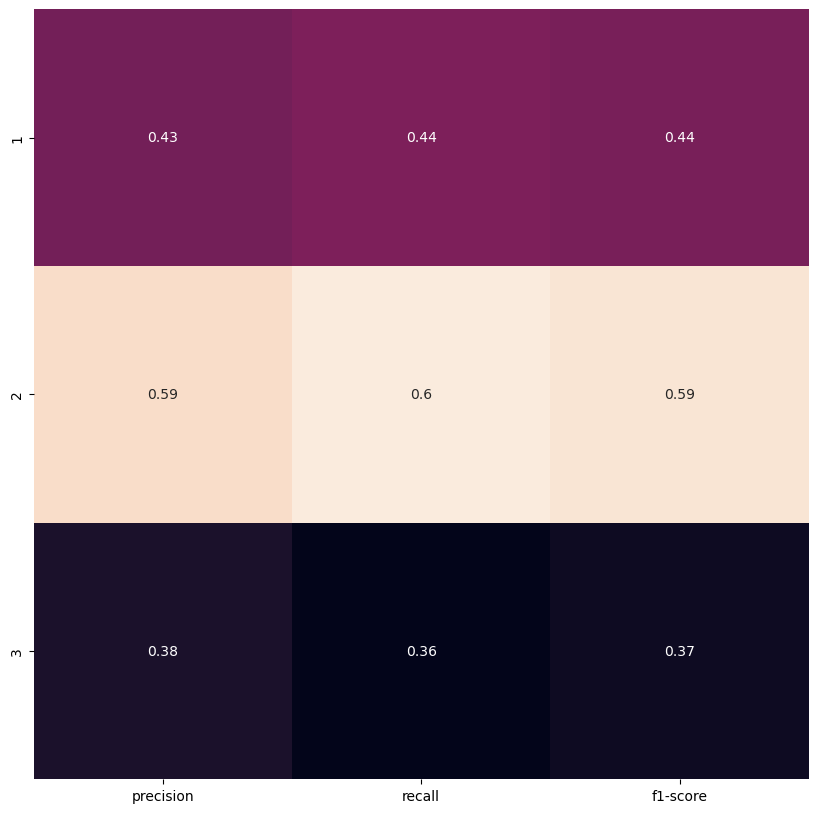

In [102]:
plot_classification_report(y_test, xgb_best_model.predict(X_test))